<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_1_Single_Layer_Perceptron_with_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Assignment 1: Single Layer Perceptron with NumPy
# Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Loading and Preparing the Dataset
# Loading the breast cancer dataset
data = load_breast_cancer()

# Select the 11th and 12th features (index 10 and 11)
X = data.data[:, [10, 11]]
y = data.target

In [5]:
# Standardizing the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Splitting the Dataset
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Displaying dataset information
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (398, 2)
Testing set size: (171, 2)


In [7]:
# Implementing Perceptron from Scratch
class Perceptron:
    """
    Single Layer Perceptron for binary classification
    """

    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Training loop
        for _ in range(self.epochs):
            for i in range(len(X)):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation(linear_output)

                # Weight update rule
                update = self.learning_rate * (y[i] - y_pred)
                self.weights += update * X[i]
                self.bias += update

    def activation(self, x):
        # Step function
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation(x) for x in linear_output])

In [8]:
# Training the Perceptron
# Initialize the perceptron
perceptron = Perceptron(learning_rate=0.01, epochs=1000)

# Train the model
perceptron.fit(X_train, y_train)

In [9]:
# Testing and Evaluating the Model
# Making the predictions
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6900584795321637

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.67      0.61        63
           1       0.78      0.70      0.74       108

    accuracy                           0.69       171
   macro avg       0.68      0.69      0.68       171
weighted avg       0.70      0.69      0.69       171



In [10]:
# Decision Boundary Function
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 11")
    plt.ylabel("Feature 12")
    plt.show()

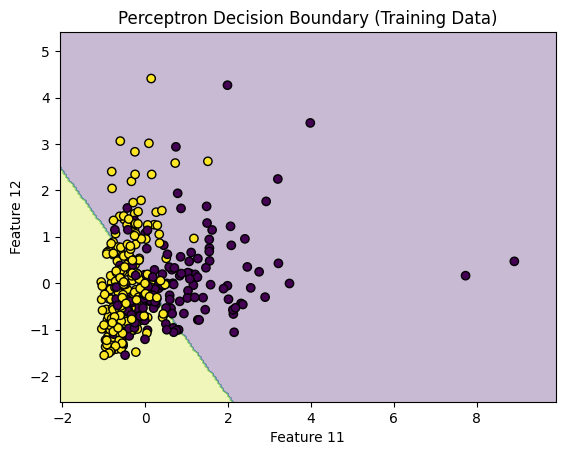

In [11]:
# Plotting Decision Boundary
plot_decision_boundary(
    X_train, y_train, perceptron,
    title="Perceptron Decision Boundary (Training Data)"
)

In [13]:
# Discussing the Results
"""
Discussion:
The single-layer perceptron have separated the two classes
by using a linear decision boundary. Because only two features are being used,
the model's performance will be limited. Other the other hand accuracy is good,
the perceptron is not able to handle non-linearly separable data, letting us know
that there is a key limitation of single-layer neural networks.
"""


"\nDiscussion:\nThe single-layer perceptron have separated the two classes\nby using a linear decision boundary. Because only two features are being used,\nthe model's performance will be limited. Other the other hand accuracy is good,\nthe perceptron is not able to handle non-linearly separable data, letting us know\nthat there is a key limitation of single-layer neural networks.\n"